In [1]:
#importing the dependencies

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import the dataset, split into features and target variables

df = pd.read_csv('../diabetes.csv')

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

#split the dataset into training and testing sets, here, I'm using the ratio 80 : 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating a model with the DecisionTreeclassifier

model = DecisionTreeClassifier(random_state=42)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluating the model
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7467532467532467
[[75 24]
 [15 40]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



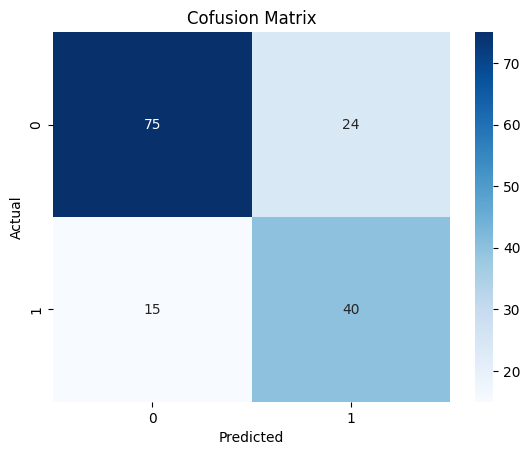

In [4]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Cofusion Matrix")
plt.show()

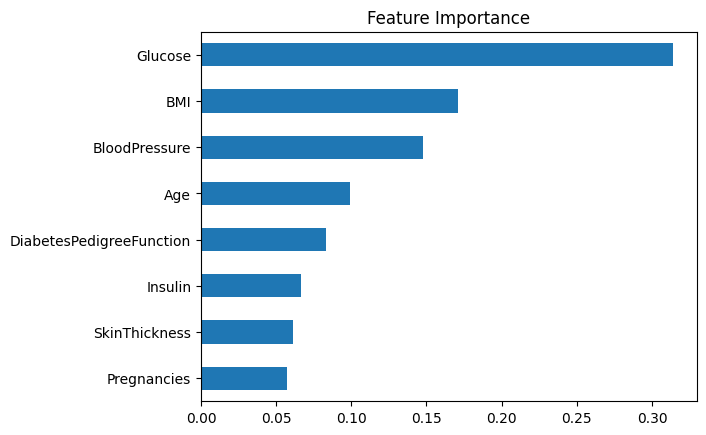

In [5]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()